# Course 3 Automatidata project

##### Course 3 - Go Beyond the Numbers: Translate Data into Insights

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work.

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 3 End-of-course project: Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables.

**The goal** is to clean data set and create a visualization.

*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration

   * Data cleaning

**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# Visualize a story in Tableau and Python

# PACE stages

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

#### PACE: Plan

In this stage, consider the following questions where applicable to complete your code response:

   * What methods are best for identifying outliers?
      * Use numpy functions to investigate the mean() and median() of the data and understand range of data values
      * Use a boxplot to visualize the distribution of the data
      * Use histograms to visualize the distribution of the data
   * How do you make the decision to keep or exclude outliers from any future models?
      * There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:
        
      * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
    
      * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
    
      * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

##### Task 1. Imports, links, and loading

Go to Tableau Public The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials: Public Tableau: https://public.tableau.com/s/

For EDA of the data, import the data and packages that would be most helpful, such as pandas, numpy and matplotlib.

Then, import the dataset.

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [173]:
df=pd.read_csv('iyPaw9UGRD-F_oU318b6Cg_f07cadf326314912bcac2fea48e87ff1_2017_Yellow_Taxi_Trip_Data.csv')

#### PACE: Analyze

Consider these questions in your PACE Strategy Document to reflect on the Analyze stage.

##### Task 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set. Then answer these questions to yourself:

Given our scenario, which data columns are most applicable? Which data columns can I eliminate, knowing they won’t solve our problem scenario?

Consider functions that help you understand and structure the data.

   * head()
   * describe()
   * info()
   * groupby()
   * sortby()

Consider these questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?

Find these answers later in the notebook.

Start by discovering, using head and size.

In [174]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [175]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**Exemplar note:** There is no missing data according to the results from the info() function.

##### Task 2b. Assess whether dimensions and measures are correct

On the data source page in Tableau, double check the data types for the applicable columns you selected on the previous step. Pay close attention to the dimensions and measures to ensure they are correct.

In Python, consider the data types of the columns. Consider: Do they make sense?

Review the link provided in the previous activity instructions to create the required Tableau visualization.

##### Task 2c. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful?

   * Line graph
   * Bar chart
   * Box plot
   * Histogram
   * Heat map
   * Scatter plot
   * A geographic map
     
**Exemplar response:**

As you'll see below, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data.

A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of **trip_distance, duration,** and **total_amount**

A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as **trip_distance** and **total_amount**

A bar chart will help determine average number of trips per month, weekday, weekend, etc.

#### PACE: Construct

Consider these questions in your PACE Strategy Document to reflect on the Construct stage.

##### Task 3. Data visualization

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!

#### Boxplots and Histograms

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms.

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.

In [177]:
# Convert data columns to datetime

df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

**trip_distance boxplot**

<Axes: title={'center': 'trip distance'}, xlabel='trip_distance'>

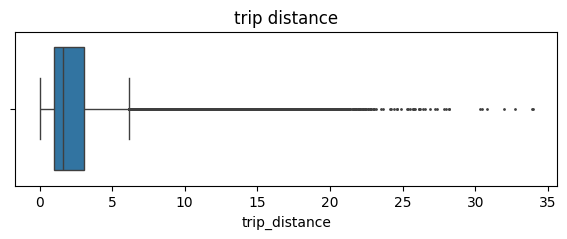

In [178]:
# Create box plot of trip_distance

plt.figure(figsize=(7,2))
plt.title('trip distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1)

**trip distance histogram**

<Axes: title={'center': 'trip distance'}, xlabel='trip_distance', ylabel='Count'>

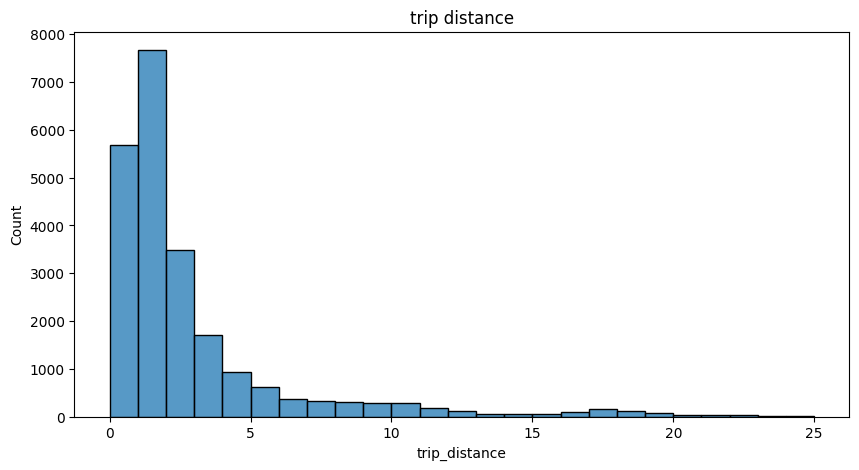

In [179]:
# Create histogram of trip_distance

plt.figure(figsize=(10,5))
plt.title('trip distance')
sns.histplot(df['trip_distance'], bins=range(0,26,1))

**Exemplar note:** The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles

**total_amount boxplot**

Text(0.5, 1.0, 'total amount')

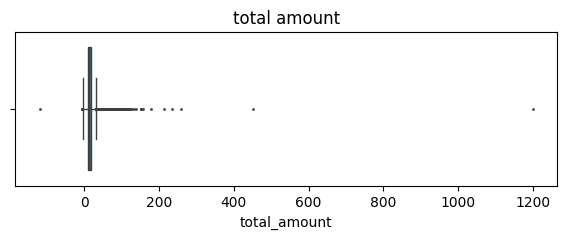

In [180]:
# Create box plot of total_amount

plt.figure(figsize=(7,2))
sns.boxplot(data=None, x=df['total_amount'], fliersize=1)
plt.title('total amount')

**total_amount histogram**

Text(0.5, 1.0, 'total amount')

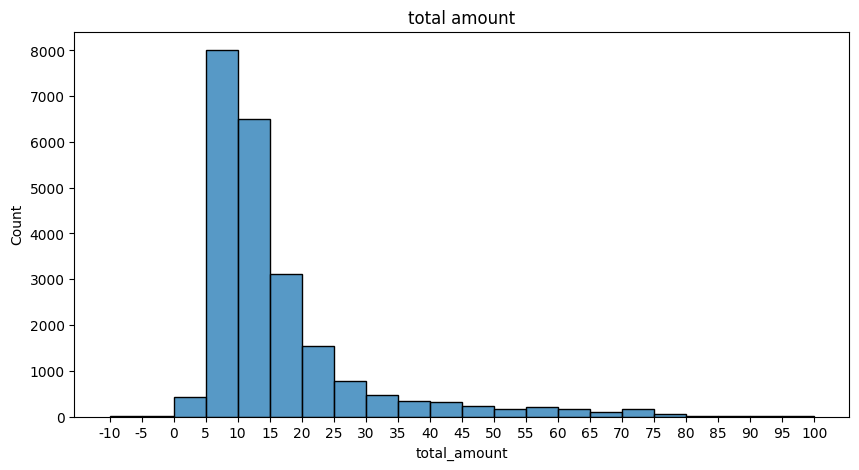

In [181]:
# Create histogram of total_amount

plt.figure(figsize=(10,5))
ax=sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('total amount')

**Exemplar note:** The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

**tip_amount boxplot**

<Axes: title={'center': 'tip_amount'}, xlabel='tip_amount'>

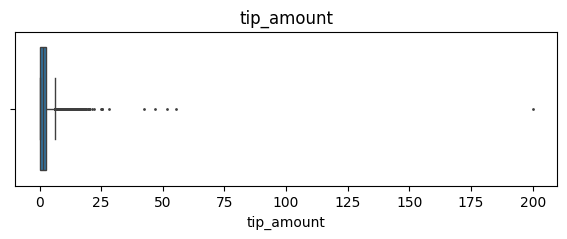

In [182]:
# Create box plot of tip_amount

plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1)

**tip amount by vendor histogram**

Text(0.5, 1.0, 'tip amount by vendor histogram')

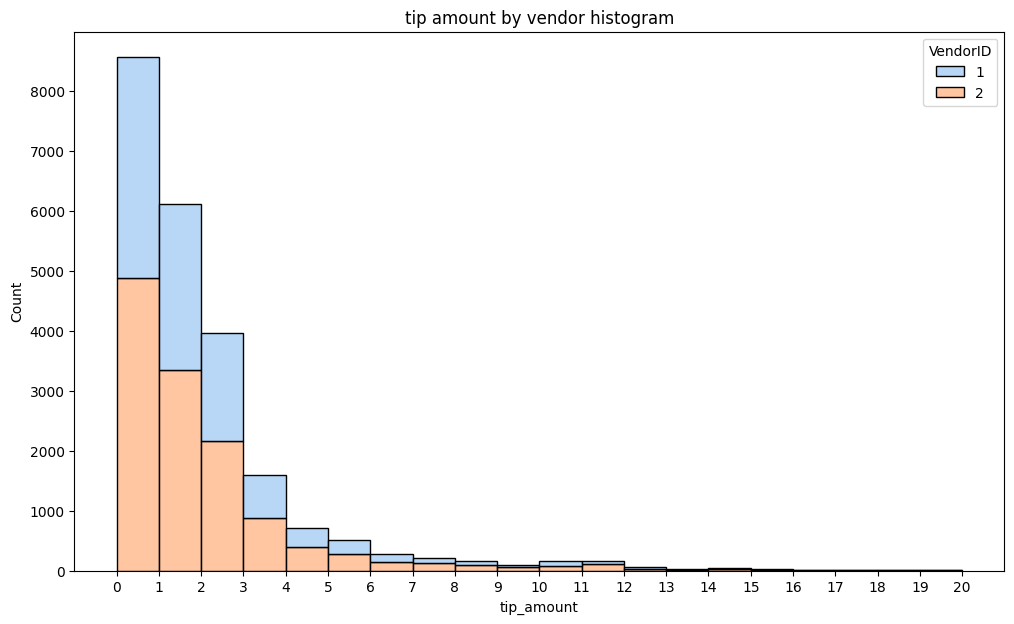

In [183]:
# Create histogram of tip_amount by vendor

plt.figure(figsize=(12,7))
ax=sns.histplot(data=df, x='tip_amount', bins=range(0,21,1),
                hue='VendorID',
                multiple='stack',
                palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('tip amount by vendor histogram')

**Exemplar note:** Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

Text(0.5, 1.0, 'tip amount by vendor histogram')

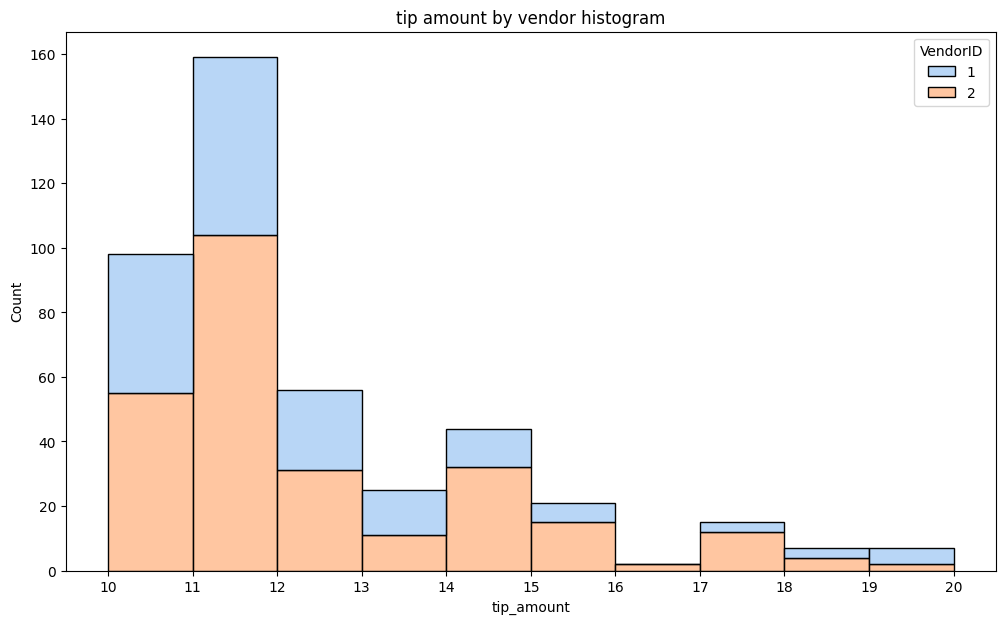

In [184]:
# Create histogram of tip_amount by vendor for tips > $10 

tips_over_ten=df[df['tip_amount']>10]
plt.figure(figsize=(12,7))
ax=sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1),
               hue='VendorID',
               multiple='stack',
               palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('tip amount by vendor histogram')

**Exemplar note:** The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

Examine the unique values in the **passenger_count** column.

In [185]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

**Exemplar note:** Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [186]:
# Calculate mean tips by passenger_count

mean_tips_by_passenger_count = df.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


Text(0.5, 1.0, 'Mean tip amount by passenger count')

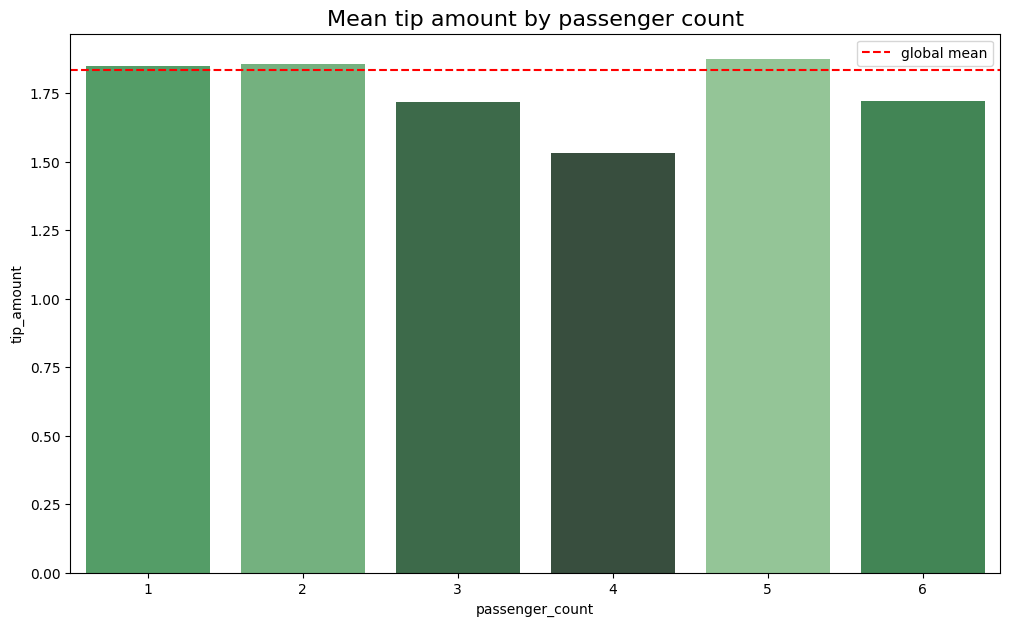

In [187]:
# Create bar plot for mean tips by passenger count

data=mean_tips_by_passenger_count.tail(-1)
pal=sns.color_palette("Greens_d", len(data))
rank=data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax=sns.barplot(x=data.index, 
               y=data['tip_amount'], 
               hue=data.index,
               palette=np.array(pal[::-1])[rank].tolist(),
               legend=False)
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16)

**Exemplar note:** Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Create month and day columns**

In [188]:
# Create a month column

df['month']=df['tpep_pickup_datetime'].dt.month_name()

# Create a day column

df['day']=df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [189]:
# Get total number of rides for each month

monthly_rides=df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

**Exemplar note:** The months are out of order.

Reorder the results to put the months in calendar order.

In [190]:
# Reorder the monthly ride list so months go in order

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides=monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

In [191]:
# Show the index

monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='month')

Text(0.5, 1.0, 'Ride count by month')

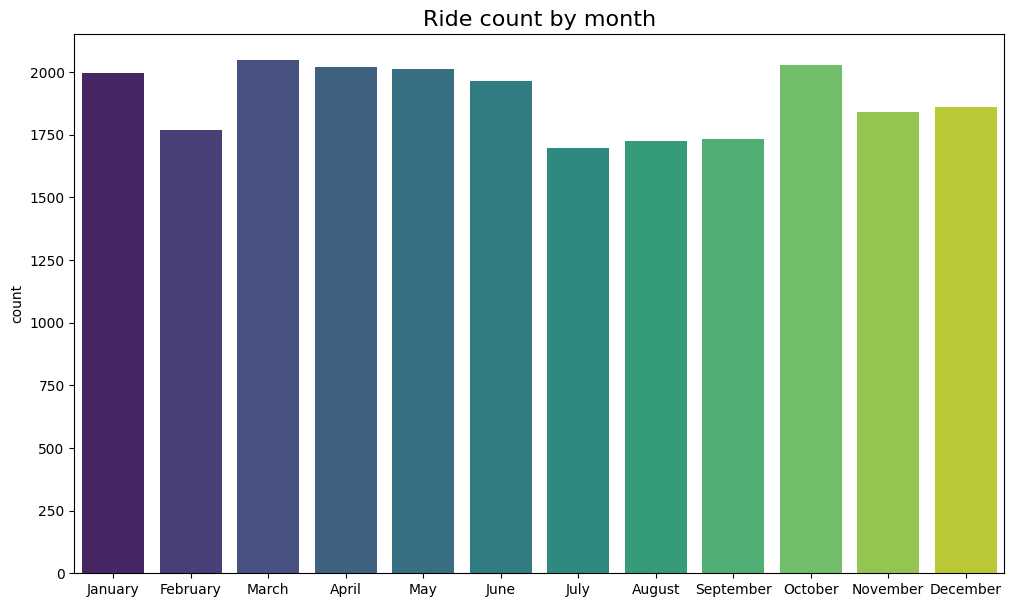

In [192]:
# Create a bar plot of total rides per month

plt.figure(figsize=(12,7))
ax = sns.barplot(x=month_order, y=monthly_rides, 
                 hue=month_order,
                 palette='viridis')
plt.title('Ride count by month', fontsize=16)

**Exemplar note:** Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [193]:
# Repeat the above process, this time for rides by day

daily_rides=df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides=daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

Text(0.5, 1.0, '')

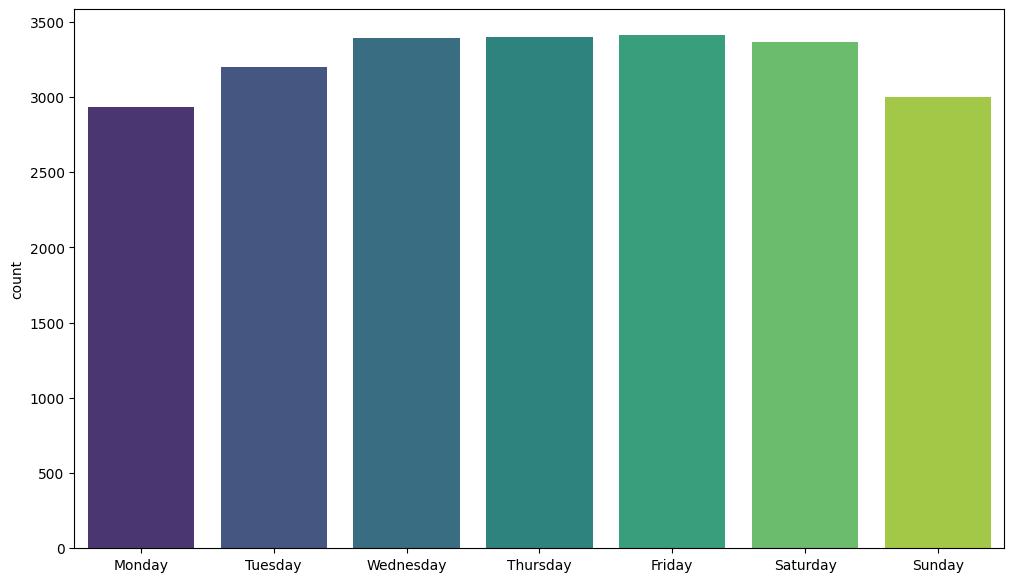

In [194]:
# Create bar plot for ride count by day

plt.figure(figsize=(12,7))
ax=sns.barplot(x=day_order, y=daily_rides,
               hue=day_order,
               palette = 'viridis')
plt.title('')

**Exemplar note:** Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [195]:
# Repeat the process, this time for total revenue by day

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')[['total_amount']].sum()
total_amount_day=total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


Text(0.5, 1.0, 'Total revenue by day')

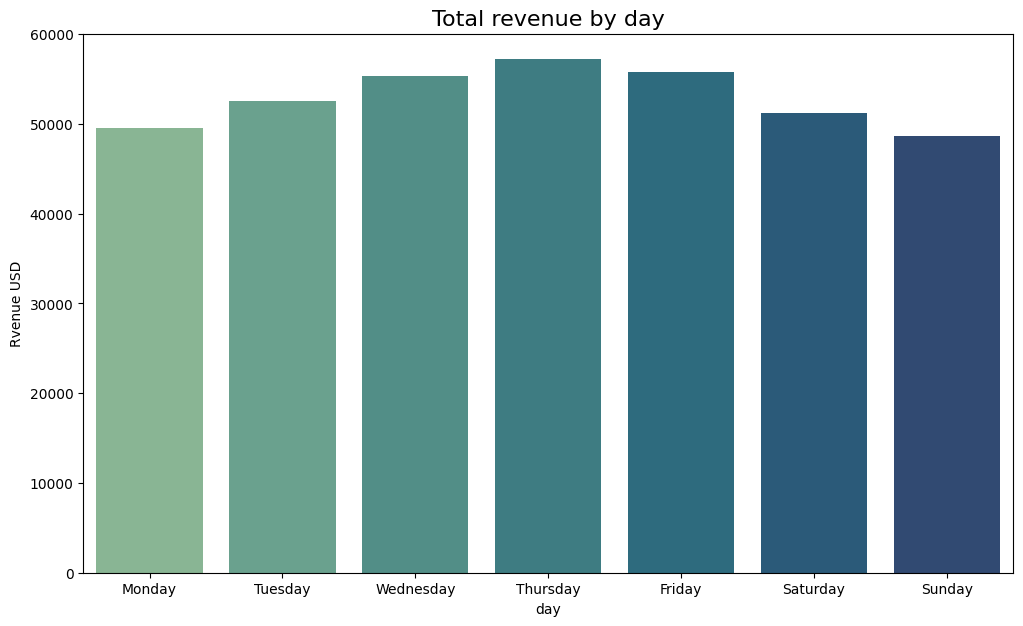

In [196]:
# Create bar plot of total revenue by day

plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'],
                hue=total_amount_day.index,
                palette = 'crest')
ax.set_ylabel('Rvenue USD')
plt.title('Total revenue by day', fontsize=16)

**Exemplar note:** Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

**Plot total revenue by month**

In [197]:
# Repeat the process, this time for total revenue by month

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
total_amount_month = df.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


Text(0.5, 1.0, 'Total revenue by month')

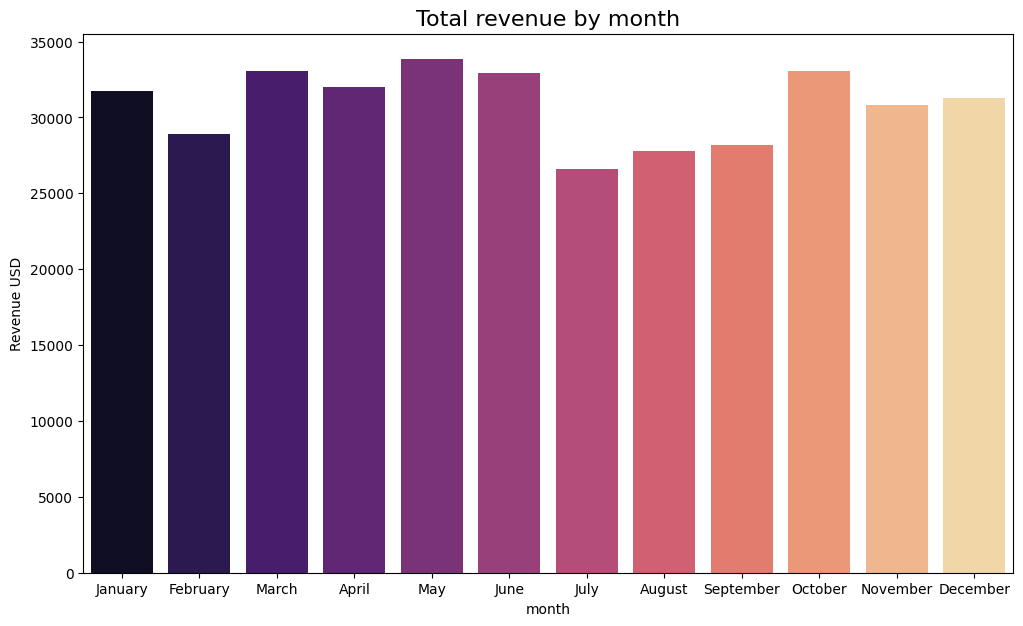

In [198]:
# Create a bar plot of total revenue by month

plt.figure(figsize=(12,7))
ax=sns.barplot(x=total_amount_month.index, y= total_amount_month['total_amount'],
               hue=total_amount_month.index,
               palette='magma')
ax.set_ylabel('Revenue USD')
plt.title('Total revenue by month', fontsize=16)

**Exemplar note:** Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

You can create a scatterplot in Tableau Public, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the following link. Those instructions create a scatterplot showing the relationship between total_amount and trip_distance. Consider adding the Tableau visualization to your executive summary, and adding key insights from your findings on those two variables.

*Tableau visualization guidelines*

**Plot mean trip distance by drop-off location**

In [199]:
# Get number of unique drop-off location IDs

df['DOLocationID'].nunique()

216

In [200]:
# Calculate the mean trip distance for each drop-off location

distance_by_dropoff=df.groupby('DOLocationID')[['trip_distance']].mean()

# Sort the results in descending order by mean trip distance

distance_by_dropoff=distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 1.0, 'Mean trip distance by drop-off location')

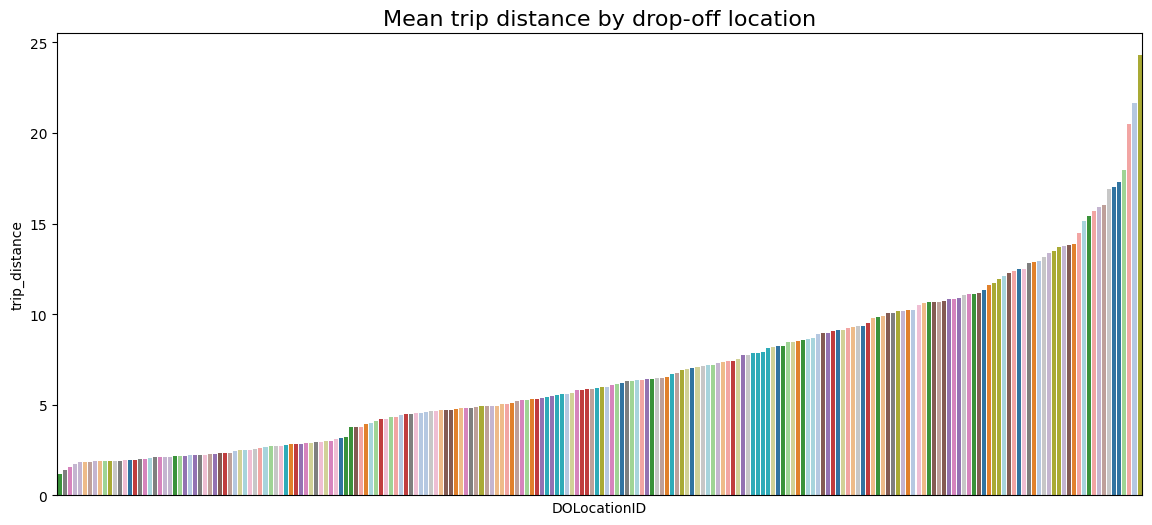

In [201]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance

plt.figure(figsize=(14,6))
ax=sns.barplot(x=distance_by_dropoff.index, 
               y=distance_by_dropoff['trip_distance'], 
               hue=distance_by_dropoff.index,
               palette='tab20',
               order=distance_by_dropoff.index,
              legend=False)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16)

**Exemplar note:** This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.

To confirm this conclusion, consider the following experiment:

      1. Create a sample of coordinates from a normal distribution—in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
      2. Calculate the distance between each pair of coordinates
      3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
      4. Plot the mean distance for each unique endpoint

Text(0.5, 1.0, 'Mean distance between points taken randomly from normal distribution')

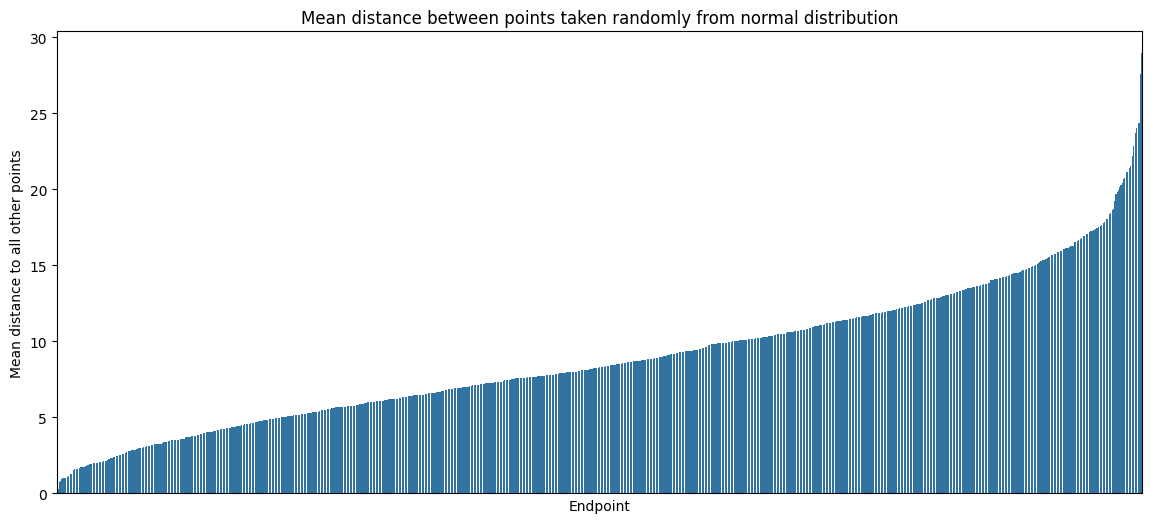

In [213]:
# 1. Generate random points on a 2D plane from a normal distribution

test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array

distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance

test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')
data_reset = data.reset_index()

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to

plt.figure(figsize=(14,6))
ax = sns.barplot(x=data_reset.index,
                 y=data_reset['distance'],
                 order=data_reset.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution')

**Exemplar note:** The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does not mean that there was an even distrubtion of rides to each drop-off point. Examine this next.

**Histogram of rides by drop-off location**

First, check whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location.

There are many ways to do this.

In [221]:
# Check if all drop-off locations are consecutively numbered

df['DOLocationID'].max()-len(set(df['DOLocationID']))

np.int64(49)

**Exemplar note:** There are 49 numbers that do not represent a drop-off location.

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

Text(0.5, 1.0, 'Histogram of rides by drop-off location')

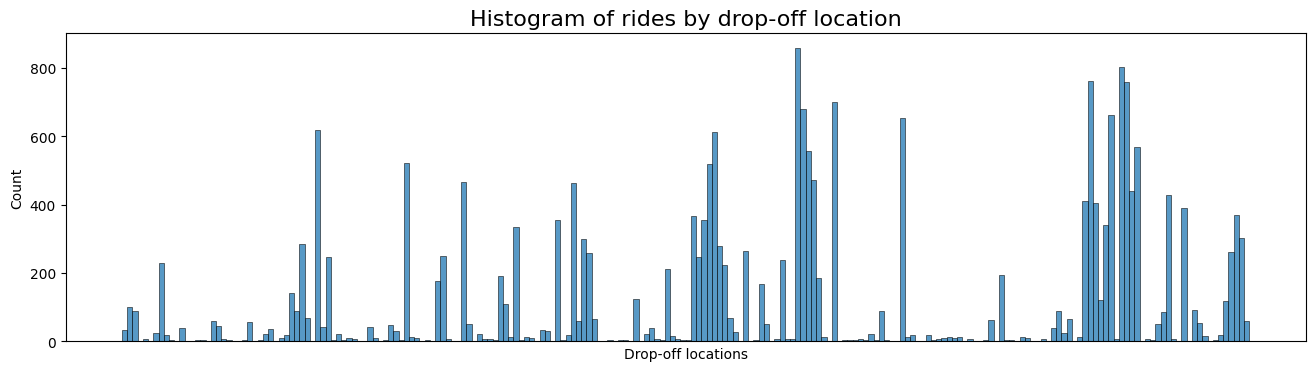

In [224]:
plt.figure(figsize=(16,4))

# DOLocationID column is numeric, so sort in ascending order

sorted_dropoffs = df['DOLocationID'].sort_values()

# Convert to string

sorted_dropoffs = sorted_dropoffs.astype('str')

# Plot

sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16)

**Exemplar note:** Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

#### PACE: Execute

Consider the PACE Strategy Document to reflect on the Execute stage.

##### Task 4a. Results and evaluation

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

**Ask yourself:** Did you consider color, contrast, emphasis, and labeling?

[Learners: insert your response here]

I have learned .... the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

My other questions are .... There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

My client would likely want to know ... that the data includes dropoff and pickup times. We can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model.

In [225]:
df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [226]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,March,Saturday,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,May,Wednesday,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,August,Tuesday,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,February,Saturday,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,November,Friday,0 days 00:20:26


##### Task 4b. Conclusion

*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:* Why is it important to conduct Exploratory Data Analysis? Why are the data visualizations provided in this notebook useful?

**Exemplar response:**

EDA is important because ...

   * *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*

Visualizations helped me understand ..

   * *That this dataset has some outliers that we will need to make decisions on prior to designing a model.*
     
You’ve now completed professional data visualizations according to a business need. Well done!

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.